### Clean sheet Options Trading pour sortir de la misere

# 1) Express goal
# 2) Set directionnality with Price Target (>50% probability to get this price)
# 3) produce what is the market implied curve
# 4) produce what is my forecasted curve


In [169]:
import yfinance as yf
import yahooquery as yq

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
sns.set_theme()

In [7]:
def price_target(ticker):
    """
    current Target price calculus can be changed
    is the trailingPE and forwardPE geniune ?
    """
    ticker_data = yf.Ticker(ticker)
    df = pd.DataFrame.from_dict(ticker_data.info, orient='index').T   
    current_market_price = df['currentPrice']
    current_pe = df['trailingPE']
    forward_pe = df['forwardPE']
    return current_market_price * (current_pe/forward_pe)

price_target("AAPL")

0    168.870338
dtype: object

In [10]:
appl = yq.Ticker("AAPL", aynchronous=True)


In [24]:
df = appl.option_chain
df

contractSymbol  strike currency  lastPrice  \
symbol expiration optionType                                                    
AAPL   2022-11-25 calls       AAPL221125C00070000    70.0      USD      72.40   
                  calls       AAPL221125C00075000    75.0      USD      75.00   
                  calls       AAPL221125C00090000    90.0      USD      60.80   
                  calls       AAPL221125C00100000   100.0      USD      50.85   
                  calls       AAPL221125C00105000   105.0      USD      34.05   
...                                           ...     ...      ...        ...   
       2025-01-17 puts        AAPL250117P00280000   280.0      USD     133.30   
                  puts        AAPL250117P00285000   285.0      USD     148.91   
                  puts        AAPL250117P00290000   290.0      USD     151.26   
                  puts        AAPL250117P00300000   300.0      USD     163.30   
                  puts        AAPL250117P00310000   310.0      USD     158.70   

                                change  percentChange  openInterest     bid  \
symbol expiration optionType                                                  
AAPL   2022-11-25 calls       0.000000       0.000000             0   78.75   
                  calls       0.000000       0.000000             6   76.00   
                  calls       0.149998       0.247317             3   61.05   
                  calls      -1.480003      -2.828212            22   51.15   
                  calls       0.000000       0.000000            12   46.15   
...                                ...            ...           ...     ...   
       2025-01-17 puts        0.000000       0.000000             0  138.00   
                  puts        0.000000       0.000000             0  132.00   
                  puts        0.000000       0.000000             0  137.00   
                  puts        0.000000       0.000000             0  147.00   
                  puts        0.000000       0.000000             0  157.00   

                                 ask contractSize       lastTradeDate  \
symbol expiration optionType                                            
AAPL   2022-11-25 calls        79.30      REGULAR 2022-10-17 17:44:18   
                  calls        76.55      REGULAR 2022-11-15 19:11:26   
                  calls        61.65      REGULAR 2022-11-18 18:08:49   
                  calls        51.70      REGULAR 2022-11-18 17:49:04   
                  calls        46.70      REGULAR 2022-11-07 19:45:11   
...                              ...          ...                 ...   
       2025-01-17 puts        142.05      REGULAR 2022-10-04 14:31:36   
                  puts        135.85      REGULAR 2022-11-07 14:51:22   
                  puts        140.95      REGULAR 2022-11-08 15:22:47   
                  puts        150.95      REGULAR 2022-11-09 17:01:38   
                  puts        160.95      REGULAR 2022-10-25 14:55:32   

                              impliedVolatility  inTheMoney  volume  
symbol expiration optionType                                         
AAPL   2022-11-25 calls                0.000010        True     0.0  
                  calls                2.658206        True     2.0  
                  calls                1.664064        True     1.0  
                  calls                1.503909        True    80.0  
                  calls                1.347660        True    14.0  
...                                         ...         ...     ...  
       2025-01-17 puts                 0.461660        True     2.0  
                  puts                 0.278144        True     2.0  
                  puts                 0.286445        True     1.0  
                  puts                 0.297126        True     1.0  
                  puts                 0.307319        True    10.0  

[1700 rows x 14 columns]

In [78]:
appl_1125_calls = df.loc[(slice(None),"2022-11-25",'calls'),("impliedVolatility", "strike")]
appl_1125_calls = df.loc[(slice(None),"2025-01-17",'calls'),("impliedVolatility", "strike")]

appl_calls = df.loc[(slice(None),slice(None),'calls'),("impliedVolatility", "strike")]

<AxesSubplot: xlabel='strike'>

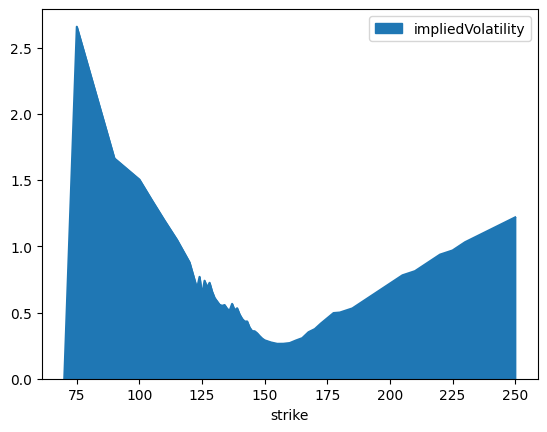

In [65]:
appl_1125_calls.plot(x='strike', y='impliedVolatility', kind='area')

In [188]:
x = df.loc[(slice(None),slice(None),'calls'),("strike")]

x_axis = set(df.loc[(slice(None),slice(None),'calls'),:]['strike'])

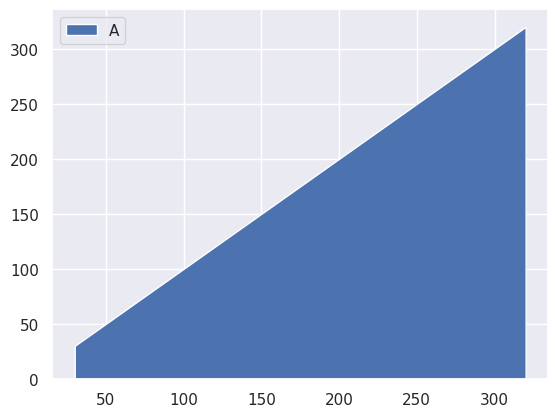

In [189]:
# Plot
plt.stackplot(list(x_axis),list(x_axis), labels=['A','B'])
plt.legend(loc='upper left')
plt.show()


In [177]:
x

expiration
2022-11-25    [70.0, 75.0, 90.0, 100.0, 105.0, 110.0, 115.0,...
2022-12-02    [75.0, 90.0, 100.0, 105.0, 110.0, 115.0, 120.0...
2022-12-09    [70.0, 90.0, 100.0, 105.0, 110.0, 115.0, 120.0...
2022-12-16    [30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65....
2022-12-23    [50.0, 55.0, 90.0, 100.0, 105.0, 110.0, 115.0,...
2022-12-30    [50.0, 60.0, 75.0, 105.0, 120.0, 123.0, 124.0,...
2023-01-20    [30.0, 35.0, 40.0, 50.0, 55.0, 60.0, 65.0, 70....
2023-02-17    [50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85....
2023-03-17    [60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95....
2023-04-21    [50.0, 60.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95....
2023-05-19    [60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95....
2023-06-16    [60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95....
2023-07-21    [60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95....
2023-09-15    [70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 10...
2024-01-19    [50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85....
2024-03-15    [50.0, 55.0, 60

In [192]:
x = df.loc[(slice(None),slice(None),'calls'),("strike", "impliedVolatility")]
x

strike  impliedVolatility
symbol expiration optionType                           
AAPL   2022-11-25 calls         70.0           0.000010
                  calls         75.0           2.658206
                  calls         90.0           1.664064
                  calls        100.0           1.503909
                  calls        105.0           1.347660
...                              ...                ...
       2025-01-17 calls        280.0           0.322761
                  calls        285.0           0.322761
                  calls        290.0           0.312415
                  calls        300.0           0.316413
                  calls        310.0           0.313483

[875 rows x 2 columns]

In [265]:
y = x.reset_index()
y["impliedVolatility"] = y["impliedVolatility"]*100
y.drop(columns=["symbol", "optionType"], inplace=True)
y

,expiration,strike,impliedVolatility
0,2022-11-25,70.0,0.001000
1,2022-11-25,75.0,265.820648
2,2022-11-25,90.0,166.406418
3,2022-11-25,100.0,150.390873
4,2022-11-25,105.0,134.765951
...,...,...,...
870,2025-01-17,280.0,32.276068
871,2025-01-17,285.0,32.276068
872,2025-01-17,290.0,31.241532
873,2025-01-17,300.0,31.641309


In [266]:
y_p = y.pivot(index="strike", columns="expiration", values="impliedVolatility")
y_p.fillna(0.0, inplace=True)
y_p

expiration,2022-11-25,2022-12-02,2022-12-09,2022-12-16,2022-12-23,2022-12-30,2023-01-20,2023-02-17,2023-03-17,2023-04-21,2023-05-19,2023-06-16,2023-07-21,2023-09-15,2024-01-19,2024-03-15,2024-06-21,2025-01-17
strike,,,,,,,,,,,,,,,,,,
30.0,0.0,0.0,0.0,251.953495,0.000000,0.00000,173.242321,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
35.0,0.0,0.0,0.0,233.594166,0.000000,0.00000,162.304876,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
40.0,0.0,0.0,0.0,212.891093,0.000000,0.00000,157.422088,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
45.0,0.0,0.0,0.0,198.437508,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50.0,0.0,0.0,0.0,185.156324,170.117337,158.98458,137.500312,116.113701,0.000000,96.630893,0.000000,0.000000,0.0,0.000000,72.766386,71.057418,66.589690,64.197135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290.0,0.0,0.0,0.0,71.875281,0.000000,0.00000,50.000500,47.266152,41.211525,36.133451,35.254554,34.473312,0.0,32.764344,31.384964,0.000000,31.867136,31.241532
295.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,45.313047,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
300.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,50.000500,46.094289,41.797457,37.891246,34.766277,33.692069,0.0,32.642275,31.580274,0.000000,30.945515,31.641309


In [275]:
y_m = y_p.stack().reset_index(name="impliedVolatility")
y_m

,strike,expiration,impliedVolatility
0,30.0,2022-11-25,0.000000
1,30.0,2022-12-02,0.000000
2,30.0,2022-12-09,0.000000
3,30.0,2022-12-16,251.953495
4,30.0,2022-12-23,0.000000
...,...,...,...
1525,320.0,2023-09-15,0.000000
1526,320.0,2024-01-19,31.738964
1527,320.0,2024-03-15,0.000000
1528,320.0,2024-06-21,31.079791


<AxesSubplot: xlabel='strike'>

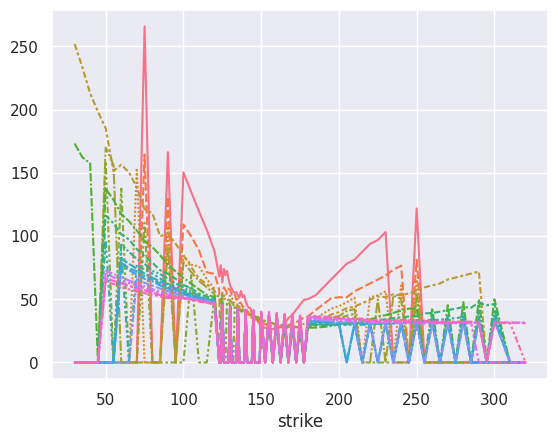

In [249]:
sns.lineplot(y_p, legend=False)


<AxesSubplot: ylabel='Density'>

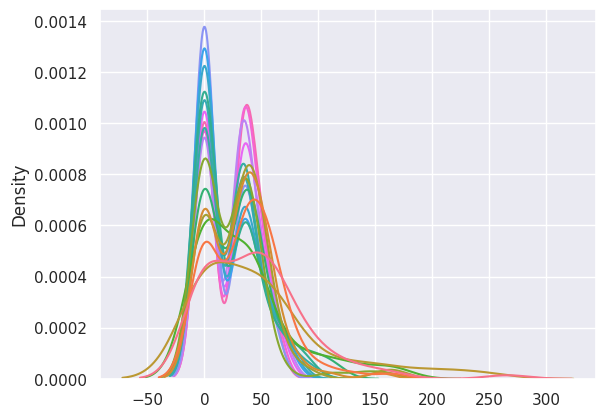

In [245]:
sns.kdeplot(y_p, legend=False)

In [252]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

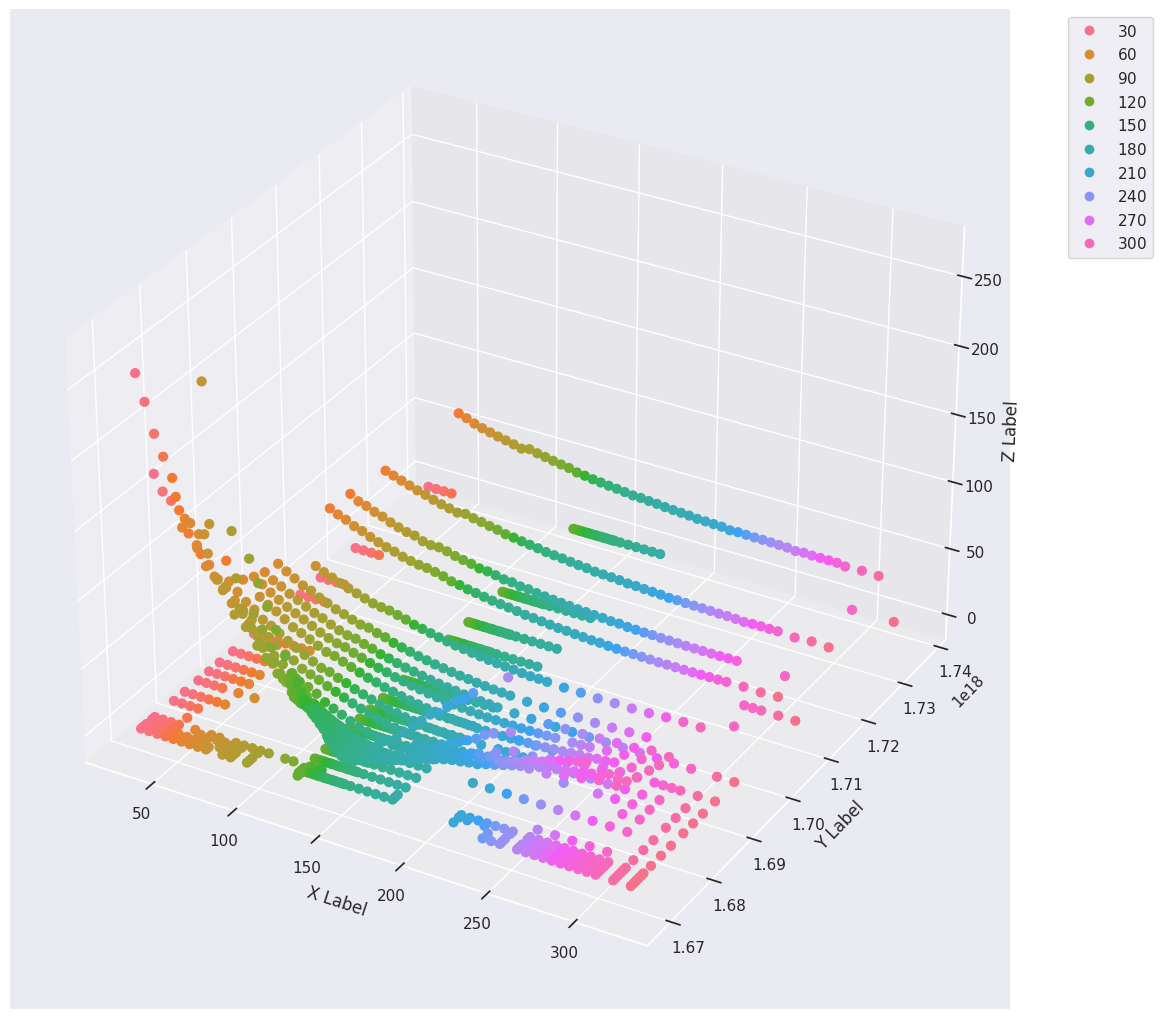

In [295]:
# axes instance
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

x = y_m["strike"]
y = y_m["expiration"].astype(np.int64)
z = y_m["impliedVolatility"]

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [278]:
x = y_m["strike"]
y = y_m["expiration"].values.astype('datetime64[D]')
z = y_m["impliedVolatility"]

In [281]:
z

0         0.000000
1         0.000000
2         0.000000
3       251.953495
4         0.000000
           ...    
1525      0.000000
1526     31.738964
1527      0.000000
1528     31.079791
1529      0.000000
Name: impliedVolatility, Length: 1530, dtype: float64